# NEURON and Jupyter Notebooks
Jupyter notebooks allow for us to give an interactive and explanatory look into code snippets allowing for a deeper learning experience.
This also means we have a method of having a single notebook containing a multiple different figures.

## Setting up the notebook
First thing we can do is import and setup neuron. If needed you can run ```pip install neuron``` or go through some of the other installation methods.

We are also going to change the working directory so it is easier to access different files.

In [1]:
import neuron
from neuron import gui
h = neuron.h

h('getcwd()')
h('chdir("../")')
h('getcwd()')

/home/joey/repos/neuron-ci/notebooks/
	0 
/home/joey/repos/neuron-ci/


1

In [2]:
h('nrn_load_dll("./x86_64/.libs/libnrnmech.so")')

	1 


1

## Python and hoc interfacing
We can test if neuron was setup correctly by running a simple calculation and checking the output. The challenge here is that the return value from running any code is always 1 (if it was successful, so to access the value of our calculation we need to store our value and then access it from python.

In [3]:
# running a calculation in hoc, but not being able to access the result
print("Sample calculation")
print(h('5+5'))

# by using a hoc variable we can access the result in python
print("\n" + "Using a hoc variable")
h('sum = 5+5')
print(h.sum)

Sample calculation
	10 
1

Using a hoc variable
10.0


## Loading hoc files

In [4]:
h('load_file("./sim/calculator.hoc")')
h('add(5,4)')

	1 
	9 


1

## Sample Ball-and-stick Tutorial
This is all sample code taken from the neuron tutorials [see here](https://neuron.yale.edu/neuron/static/docs/neuronpython/ballandstick1.html)

The difference between the tutorial is that we are accessing the model that *we* created (named hhNew). Make sure that the models have been compiled and that the dll has loaded successfully.

In [5]:
soma = h.Section(name='soma')
dend = h.Section(name='dend')
dend.connect(soma(1))
h.topology()

soma.L = soma.diam = 12.6157 # Makes a soma of 500 microns squared.
dend.L = 200 # microns
dend.diam = 1 # microns
print("Surface area of soma = {}".format(soma(0.5).area()))


|-|       soma(0-1)
   `|       dend(0-1)

Surface area of soma = 500.00296377255506


In [6]:
for sec in h.allsec():
    sec.Ra = 100    # Axial resistance in Ohm * cm
    sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

# Insert active Hodgkin-Huxley current in the soma
soma.insert('hhNew')
for seg in soma:
    seg.hhNew.gnabar = 0.12  # Sodium conductance in S/cm2
    seg.hhNew.gkbar = 0.036  # Potassium conductance in S/cm2
    seg.hhNew.gl = 0.0003    # Leak conductance in S/cm2
    seg.hhNew.el = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2
    seg.pas.e = -65    # Leak reversal potential mV

In [7]:
stim = h.IClamp(dend(1))
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

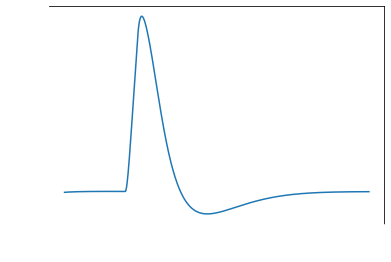

In [8]:
v_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()        # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)
simdur = 25.0

h.tstop = simdur
h.run()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_vec, v_vec)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Transmembrane Potential (mV)')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')

plt.show()

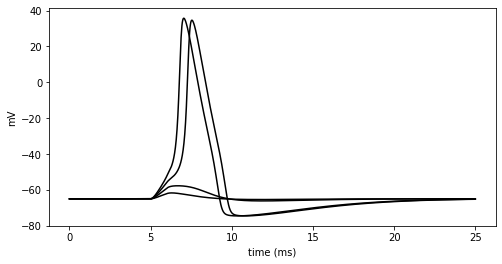

In [9]:
import numpy
plt.figure(figsize=(8,4))
step = 0.075
num_steps = 4
for i in numpy.linspace(step, step*num_steps, num_steps):
    stim.amp = i
    h.tstop = simdur
    h.run()
    plt.plot(t_vec, v_vec, color='black')

plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.show()

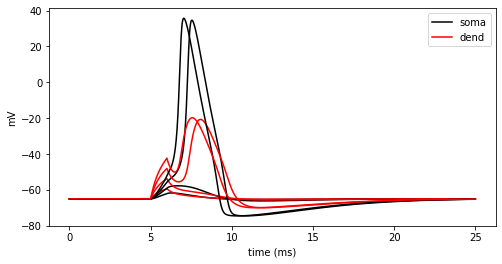

In [10]:
dend_v_vec = h.Vector()        # Membrane potential vector
dend_v_vec.record(dend(0.5)._ref_v)

plt.figure(figsize=(8,4))
for i in numpy.linspace(step, step*num_steps, num_steps):
    stim.amp = i
    h.tstop = simdur
    h.run()
    soma_plot = plt.plot(t_vec, v_vec, color='black')
    dend_plot = plt.plot(t_vec, dend_v_vec, color='red')

# After looping, actually draw the image with show.
# For legend labels, use the last instances we plotted
plt.legend(soma_plot + dend_plot, ['soma', 'dend'])
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.show()